# Segunda Entrega Trabajo Final - Data Science - CODER HOUSE

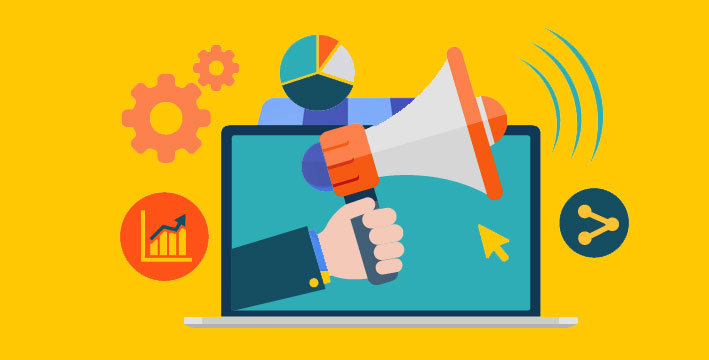

### Conformación del equipo de trabajo:
* German Gutierrez Rial
* Gastón Barroso
* Enrique Manzano
* Francisco Negrete

### Tutor Fernando Pareja

### Presentación de la empresa: 
Análisis de las campañas de marketing de una empresa en base a compras de diferentes productos, y las particulares características de cada uno de los clientes, por ejemplo, el salario anual, o la cantidad de vino que consumen.  
Dadas las últimas 5 campañas, se puede llegar a determinar cual va a ser la respuesta (afirmativa o negativa) a una nueva campaña para tratar de captar nuevos clientes.

### Preguntas y objetivos de la investigación:
* ¿En que producto gastan más los clientes?
* ¿Cuál de las anteriores campañas tuvo mayor exito?¿Existe una razón aparente de ese exito?
* ¿Hay una correlación entre el nivel de educación obtenido y los ingresos?
* ¿Hay una correlación entre la cantidad de niños por casa, y la compra de productos, por ejemplo, de vino?
* ¿Cuál es el producto que más se vendió?
* ¿Hay correlaciones entre los ingresos y las respuestas a las campañas?
* ¿Hay correlaciones entre los estudios y las respuestas a las campañas?
* ¿Hay correlación entre el nivel de sueldo y el de gasto?
* ¿Cuáles son los clientes más "predispuestos" a aceptar ante una nueva campaña de marketing? ¿Cuáles son los menos predispuestos?

### Definir objetivo u objetivos para trabajar esos datos

Nuestro objetivo principal es el de clasificar a los clientes, para poder determinar si van a aceptar o no la proxima campaña de marketing que vaya a realizar la empresa.  
El propósito de hacer esto, sería el de conocer de "antemano" cuales van a ser las personas más predispuestas a aceptar la campaña, para de esta forma, hacer un mayor foco en ese grupo.  
De igual manera, con los segmentos que tenemos la información suficiente para predecir que no van a aceptar la campaña, tratar de buscar indicadores de porque no la aceptarían. 

### Indicación de la fuente del dataset y los criterios de selección:
El Dataset fue obtenido del sitio Kaggle, desde el siguiente link se puede acceder al mismo: 
[Marketing Campaing Dataset](https://www.kaggle.com/rodsaldanha/arketing-campaign) 

### Contar la Historia

Disponemos de la información suficiente, en nuestra base de datos, para poder predecir cual es el tipo de cliente que va a aceptar de manera positiva una nueva campaña de marketing. Por ejemplo, conocemos cuantas veces fue necesario contactarlos para que la acepten y, también, hace cuanto que no son contactados.  
Cuanta mayor porcentaje de eficiencia tenga modelo que vamos a realizar, la empresa va a disponer de una mayor certeza para poder comenzar con una nueva campaña de merketing, cuyos resultados deberían ser acordes a las predicciones hechas.

## Importar librerías 

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set_theme()
import statsmodels.api as sm               
import statsmodels.formula.api as smf    
from seaborn import boxplot
from seaborn import distplot
from seaborn import lmplot
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn import linear_model

import warnings

## Carga de Dataset

In [89]:
df =pd.read_csv('marketing_campaign.csv', sep=";", decimal=",", parse_dates=['Dt_Customer'])

In [90]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


## Métodos para conocer composición del DataFrame

In [4]:
#Ver las columnas
for columns in df:
    print(columns)

ID
Year_Birth
Education
Marital_Status
Income
Kidhome
Teenhome
Dt_Customer
Recency
MntWines
MntFruits
MntMeatProducts
MntFishProducts
MntSweetProducts
MntGoldProds
NumDealsPurchases
NumWebPurchases
NumCatalogPurchases
NumStorePurchases
NumWebVisitsMonth
AcceptedCmp3
AcceptedCmp4
AcceptedCmp5
AcceptedCmp1
AcceptedCmp2
Complain
Z_CostContact
Z_Revenue
Response


In [91]:
#Vemos los tipos de datos de cada una de las columnas
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [93]:
#Ver la cantidad de filas y columnas

print("La cantidad de filas y columnas de p_data es:", df.shape)

La cantidad de filas y columnas de p_data es: (2240, 29)


In [94]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


## Pruebas, Validaciones y EDA

In [96]:
#Prueba y validación de valores NaN en df

print("Dataframe el Dataframe: \n")
print(df)

df_p_null = df.isnull()
print("Dataframe para corroborar: \n")
print(df_p_null)

Dataframe el Dataframe: 

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58 

In [97]:
#Vuevlo a hacer otro tipo de validación para valores NaN en df

check_for_any_nan= df.isna().any().any()
total_nan_values = df.isna().sum().sum()

print("NaN presentes es df:"+str(check_for_any_nan))
print ("Cantidad total de valores NaN:"+str(total_nan_values))

NaN presentes es df:True
Cantidad total de valores NaN:24


In [98]:
#Conocer la cantidad de valores unicos que existen para cada columna.
#A continuación hago una función para evaluar cada columna que se necesite saber su información, sin tener que realizar todos los prints por separado.

def unique_values(x):
    
    return x.unique()
    
values = unique_values(df["Response"])

print("Los valores únicos de la siguientes columna son:", values)

Los valores únicos de la siguientes columna son: [1 0]


In [99]:
#Otro doble chequeo para conocer si los ID se repiten.

f = df.ID.unique()

#Utilizo otro método con Numpy. El return_counts obtiene el número de ocurrencias de cada valor

np.unique(df["ID"], return_counts=True)

(array([    0,     1,     9, ..., 11187, 11188, 11191], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 1], dtype=int64))

In [100]:
#Chequeo de si las columnas con balores bool son efectivamente binarias
def binaria(x):
    return x.unique()

binaria(df["Complain"])

array([0, 1], dtype=int64)

In [101]:
#Mediante el siguiente código, podemos comprobar donde es que están los valores NaN
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

## Data Wrangling

La columna Dt_Customer indica la fecha en que cada cliente se enroló en la compañia. El tipo de dato tiene que ser de fecha, pero viene dado como object, por lo que hay que castearlo.

In [102]:
#Armamos un Pandas Series para hacer una prueba previa de funcionamiento de casteo, antes de realizarlo en el DF principal
to_time = pd.to_datetime(df["Dt_Customer"])
#Resultado dtype('<M8[ns]') que es equivalente a un datetime

#Luego, directamente cargamos el parse_dates en la primer carga de la base de datos.

Tenemos en dos columnas separadas, por un lado, el total de niños por casa, y por el otro, el total de adolescentes. Nos puede servir tener el total de menores de edad que tenemos por ubicación.  
Para tener en cuenta, solo tenemos datos de la cantidad de descendientes que viven por techo, es decir, no sabemos si otros relativos también habitan el mismo espacio. Además, tampoco sabemos si, en caso de padres separados, ambos siguen viviendo juntos (podríamos dejar asentado que padres separados solo uno vive en la casa con los hijos).  



In [103]:
df['Total_hijos'] = df.loc[df['Kidhome'] >= 0,['Kidhome','Teenhome']].sum(axis=1)

Lo que vamos a hacer a continuación, es generar una nueva columna, en la cual segmentamos los tipos de salarios de todos los clientes, basandonos en si son bajos, medios, altos u outliers.    
Tienen carácter subjetivo, pero basicamente separamos los tres primeros en base al área dentro de la curva del gráfico, más un tipo de salario más, de los que se encuentran por fuera.

<AxesSubplot:xlabel='Income', ylabel='Count'>

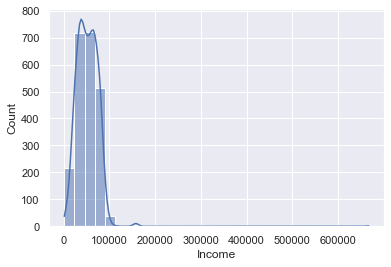

In [104]:
#Distribución de los salarios
sns.histplot(data=df, x='Income', bins=30, kde=True)

In [105]:
salarios = [(df.Income < 40000), 
            (df.Income >= 40000) & (df.Income < 65000),
            ((df.Income >= 65000) & ( df.Income < 100000)),
            (df["Income"] >= 100000)]

valores_salarios = ['Low', 'Medium', 'High', 'Outlier']

df['Tipo_Salario'] = np.select(salarios, valores_salarios)

df['Tipo_Salario'].value_counts()

#Acá hay que corregir los 24 NaN que tenemos, que nos aparecen en este columna nueva también

Medium     808
Low        732
High       663
0           24
Outlier     13
Name: Tipo_Salario, dtype: int64

La columna Year_Birth en sí no tiene mucho sentido, a menos que provenga de otra tabla relacional con más información personal.  
Entonces, lo que proponemos, es reemplazarla con la edad actual (al año 2022) de cada uno de los clientes. De esta forma, obtenemos una columna con "mejores" funcionalidades para hacer análisis.

In [106]:
año_actual = df['Year_Birth'].sub(2022).mul(-1)

año_actual

df["Age"] = año_actual

#Luego, nos queda eliminar la columna de nacimiento. En caso de querer restaurarla, se tiene que hacer el mismo procedimiento, es decir, restar la edad actual a 2022.

Luego de hacer el cambio de columnas de edad, lo vamos a hacer es buscar los outliers que existan. En este caso, si tenemos que eliminarlos porque, aunque pueden haber personas que tengan más de 90 años, lo más probable es que no tengan un sueldo anual.

C:\Users\usuario\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

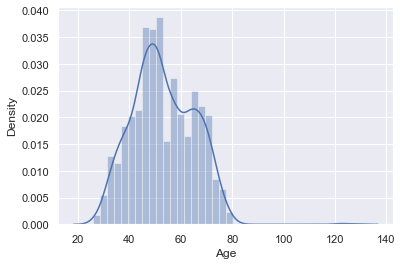

In [107]:
#Distribución de la edad
distplot(df.Age)

In [108]:
outliers_edad = df.loc[df['Age']>80]
outliers_edad
#Con esta query, podemos comprobar que existen tres registros donde la edad de las personas superan ampliamente la expectativa de vida normal o esperada para una persona
#Por lo que los vamos a eliminar de nuestro dataset.

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_hijos,Tipo_Salario,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,1,3,11,0,1,Low,122
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,3,11,0,1,Medium,129
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,0,3,11,0,0,High,123
424,6932,1941,PhD,Married,93027.0,0,0,2013-04-13,77,1285,...,1,0,0,0,3,11,0,0,High,81
1950,6663,1940,PhD,Single,51141.0,0,0,2013-07-08,96,144,...,0,0,0,0,3,11,0,0,Medium,82


In [109]:
#Procedemos a la eliminación de los ID 7829, 11004 y 1150.
#El axis tiene que ser 0, si es uno, se borra la columna
df.drop([192], axis = 0, inplace = True)

In [110]:
df.drop([239], axis = 0, inplace = True)

In [111]:
df.drop([339], axis = 0, inplace = True)

Ahora, pasamos a realizar el cambio (re arreglo) del orden de las columnas, para esto, vamos a trabajar con un dataframe nuevo.

In [112]:
#Utilizamos el método copy() para crear una copia, sin utilizar el operador igual.
df_f = df.copy()

In [113]:
#Ahora si hacemos el cambio de orden de las columnas del dataframe
df_f = df_f[['ID', 'Year_Birth', 'Age', 'Education', 'Marital_Status', 'Income', 'Tipo_Salario', 'Kidhome', 'Teenhome','Total_hijos', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']]

df_f

,ID,Year_Birth,Age,Education,Marital_Status,Income,Tipo_Salario,Kidhome,Teenhome,Total_hijos,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,65,Graduation,Single,58138.0,Medium,0,0,0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,68,Graduation,Single,46344.0,Medium,1,1,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,57,Graduation,Together,71613.0,High,0,0,0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,38,Graduation,Together,26646.0,Low,1,0,1,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,41,PhD,Married,58293.0,Medium,1,0,1,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,55,Graduation,Married,61223.0,Medium,0,1,1,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,76,PhD,Together,64014.0,Medium,2,1,3,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,41,Graduation,Divorced,56981.0,Medium,0,0,0,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,66,Master,Together,69245.0,High,0,1,1,...,3,0,0,0,0,0,0,3,11,0


Finalmente, ahora si tenemos que hacer una eliminación de los salarios que sean outliers. En un primer momento, intentamos trabajar con estos incluídos, pero terminan afectando mucho la relación y distribución con el resto de los clientes.

In [114]:
#Borro el outlier de incomes
outlier_income = df_f.loc[df_f['Income']>300000]
outlier_income
df_f.drop([2233], axis = 0, inplace = True)

Consideramos que hemos realizado un Data Wrangling que no necesariamente haga un sobre ajuste luego con el modelo predictivo. 

## Análisis Univariado de los datos  

## 1) Countplots

### Education

In [115]:
df_f.Education.describe()

count           2236
unique             5
top       Graduation
freq            1126
Name: Education, dtype: object

In [116]:
df_f.Education.value_counts()

Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64

In [117]:
count_ed = df_f['Education'].value_counts()
count_ed / len(df_f.Education) * 100

Graduation    50.357782
PhD           21.690519
Master        16.547406
2n Cycle       8.989267
Basic          2.415027
Name: Education, dtype: float64

<AxesSubplot:xlabel='Education', ylabel='count'>

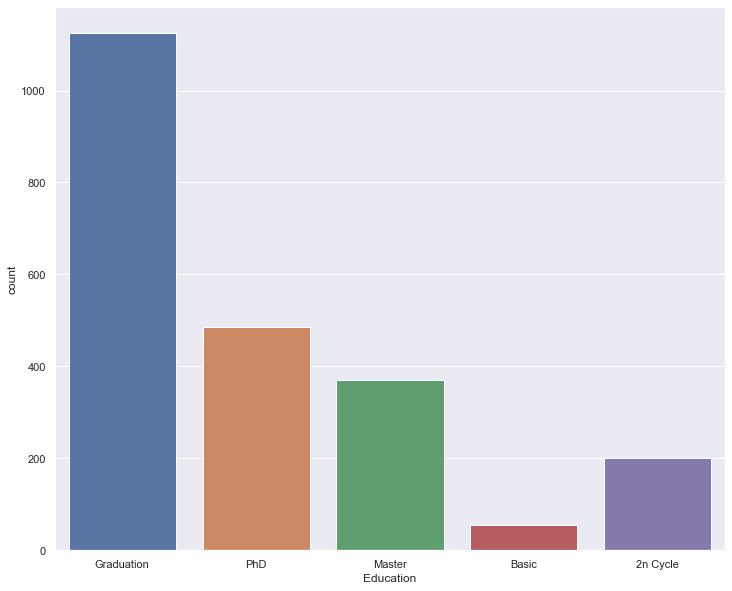

In [118]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_f, x=df_f['Education'])

### Marital Status

In [119]:
df_f.Marital_Status.value_counts()

Married     864
Together    578
Single      479
Divorced    231
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [120]:
count_ms = df_f['Marital_Status'].value_counts()
count_ms / len(df_f.Marital_Status) * 100

Married     38.640429
Together    25.849732
Single      21.422182
Divorced    10.330948
Widow        3.443649
Alone        0.134168
Absurd       0.089445
YOLO         0.089445
Name: Marital_Status, dtype: float64

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

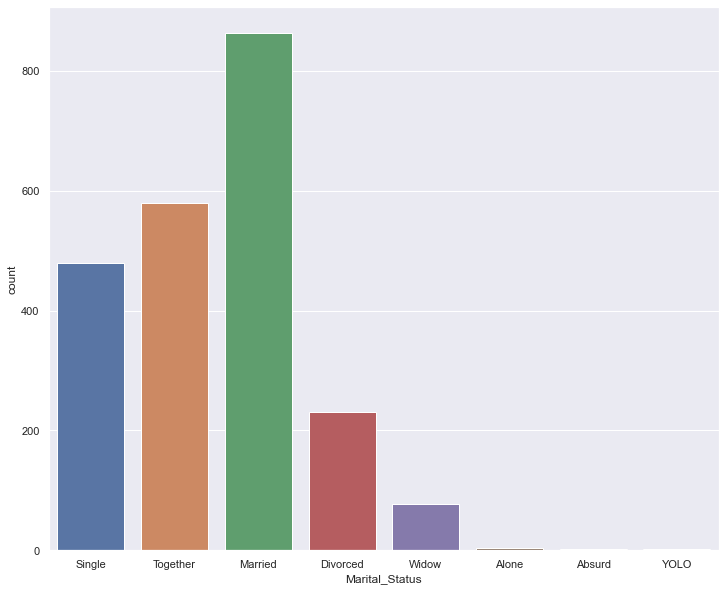

In [121]:
plt.figure(figsize=(12,10))
sns.countplot(data=df_f, x=df['Marital_Status'])

## 2) Violin Plots

Text(0.5, 1.0, 'Violin Plot entre Education e Income')

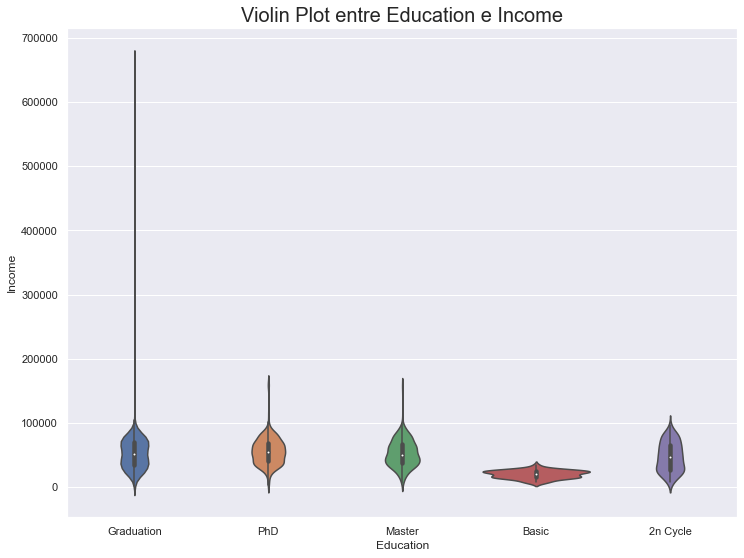

In [122]:
#Violin Plot entre Education e Income
plt.rcParams ['figure.figsize'] = (12,9)
sns.violinplot(data=df, x='Education', y='Income', pallete= 'colorblind')
plt.title ('Violin Plot entre Education e Income', fontsize = 20,fontweight = 30)

Text(0.5, 1.0, 'Violin Plot entre Marital_Status e Income')

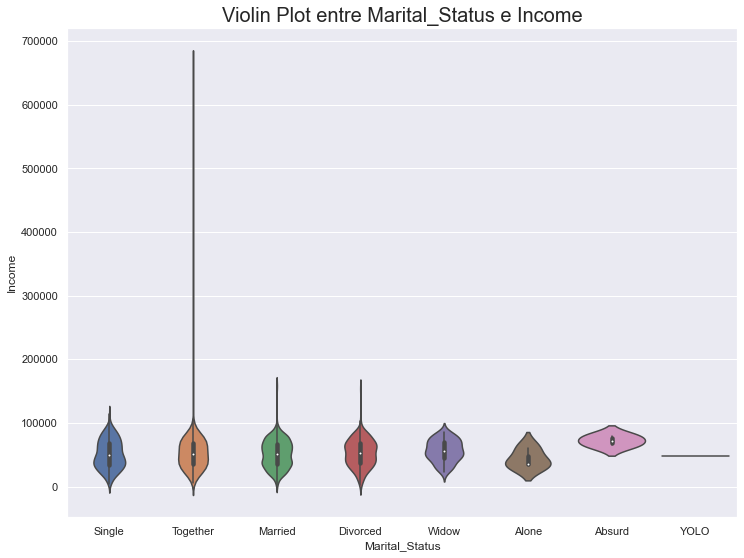

In [123]:
#Violin Plot entre Marital_Status e Income
plt.rcParams ['figure.figsize'] = (12,9)
sns.violinplot(data=df, x='Marital_Status', y='Income', pallete= 'colorblind')
plt.title ('Violin Plot entre Marital_Status e Income', fontsize = 20,fontweight = 30)

##                                              Análisis Bivariado de los datos

## 1) Scatter Plots: Variables continuas/ numéricas

### Date of Birth Vs Income

#### Vamos a hacer un análisis de las variables Income y de la variable Year_Birth. La idea es conocer si hay algún tipo de relación en cuanto a la cantidad de ingresos anuales, con el año de nacimiento. Por ejemplo, se podría llegar a esperar que, cuanto menor y mayor se es (es decir, en los extremos), el sueldo sea menor.

<AxesSubplot:xlabel='Year_Birth', ylabel='Income'>

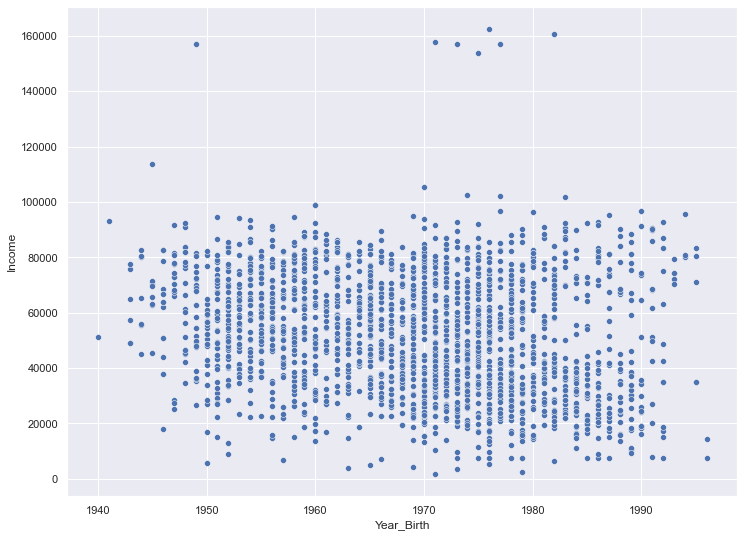

In [124]:
#Scatter plot de las dos variables
sns.scatterplot(data=df_f, x='Year_Birth', y='Income')

In [125]:
#Método para ver la correlación de las variables
df_f["Year_Birth"].corr(df_f["Income"])

-0.19997664643880725

In [126]:
#Para hacer un análisis más profundo (visualmente), lo que hacemos es separar en dos rangos distintos los salarios
#de cada uno de nuestros clientes.
df_income_90k_plus = df_f[df_f['Income']>90000]
df_income_90k_less = df_f[df_f['Income']<=90000]

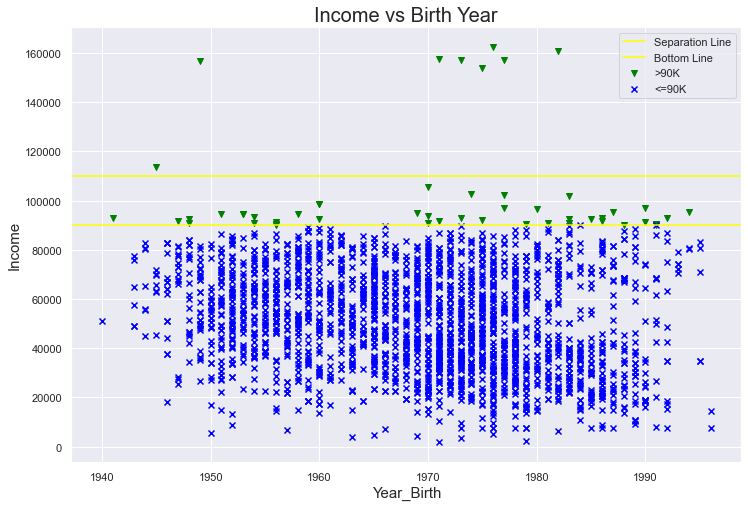

In [127]:
#Ploteamos el mismo scatter, pero con las diferencias de rangos nuevas
plt.figure(figsize=(12,8))
plt.xlabel("Year_Birth", size= 15)
plt.ylabel("Income", size=15)
plt.title("Income vs Birth Year", size = 20)
plt.scatter(df_income_90k_plus["Year_Birth"], df_income_90k_plus["Income"], color="green",marker = 'v')
plt.scatter(df_income_90k_less["Year_Birth"], df_income_90k_less["Income"], color="blue",marker = 'x')
plt.axhline(y=90000, xmin=0, xmax=2, color="yellow")
plt.axhline(y=110000, xmin=0, xmax=2, color="yellow")
plt.legend(['Separation Line','Bottom Line', '>90K', '<=90K'], loc=1)

Lo que hicimos fue separar a partir de 90K de income en dos grupos, es decir, trazamos una simple línea que los separa en ese nivel de salario. 

[Text(0.5, 1.0, 'Target Salarios 90K o más')]

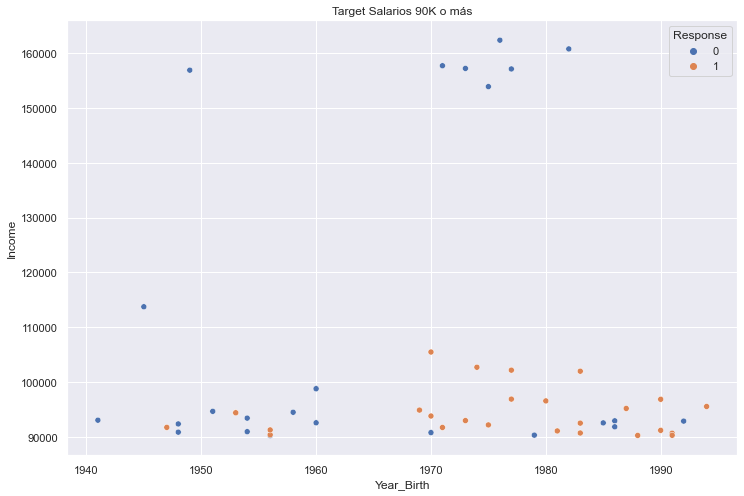

In [128]:
#Me fijo de las personas con salario mayor a 90K como es su response
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year_Birth', y='Income', data=df_income_90k_plus, hue='Response',
                ec=None).set(title='Target Salarios 90K o más')

Lo que terminos descubriendo es que, para los rangos salariales entre 90K y 100K, las personas están más predispuestas a aceptar nuestra última campaña de marketing. A esto le tenemos que agregar una similitud más: las personas que nacieron a partir de 1970 hasta 1990, también tienen más probabilidad de ser afirmativos.  
Por lo que, en una primer instancia, nos podemos enfocar en este grupo específico de clientes para hacer la campaña.

### Wine Vs Income

#### Vamos a hacer un análisis de las variables Income y de la variable MntWines. La idea es conocer como se distribuye en un plano los gastos anuales en vino por cliente, en relación a sus ingresos.

[Text(0.5, 1.0, 'Target Salarios 90K o más')]

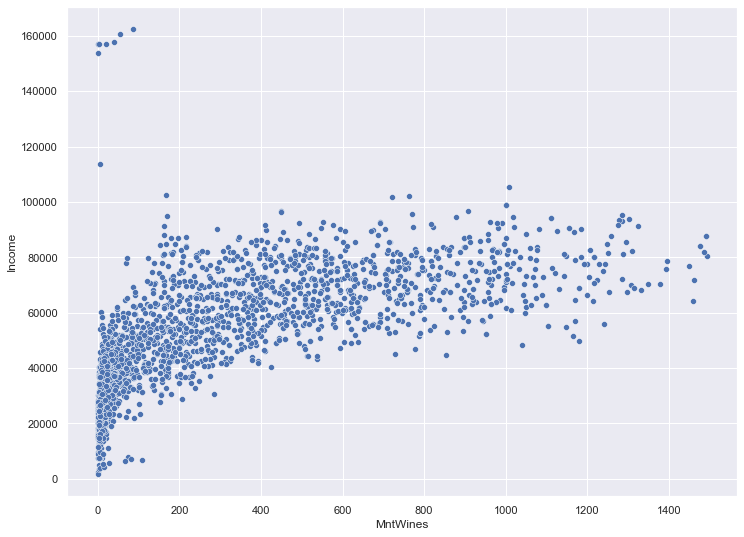

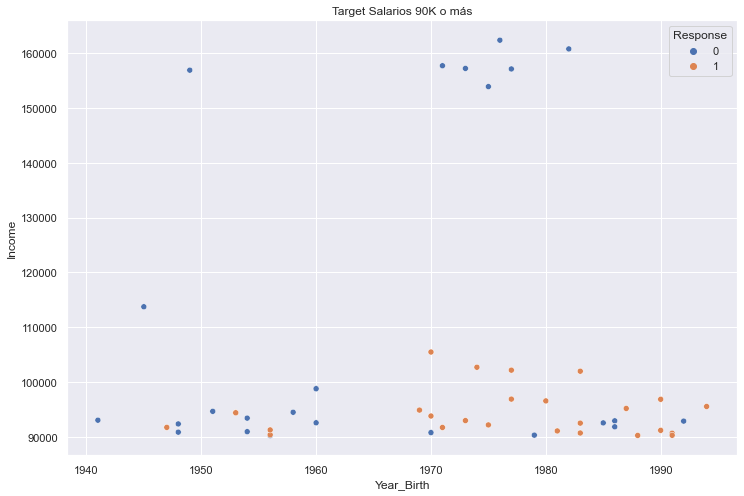

In [129]:
#Scatter plot de las dos variables
sns.scatterplot(data=df_f, x='MntWines', y='Income')

#Me fijo de las personas con salario mayor a 90K como es su response
plt.figure(figsize=(12,8))
sns.scatterplot(x='Year_Birth', y='Income', data=df_income_90k_plus, hue='Response',
                ec=None).set(title='Target Salarios 90K o más')

In [130]:
#Vemos la correlación entre las dos variables
df_f["Income"].corr(df_f["MntWines"])

0.6882092751782272

In [131]:
#Para hacer un análisis más profundo (visualmente), lo que hacemos es separar en tres rangos distintos los salarios
#de cada uno de nuestros clientes.

df_income_range = df_f[(df_f['Income'] >= 80000) & (df_f['Income'] <= 110000)]

df_income_not_range = df_f[df_f['Income']<80000]

df_income_over_range = df_f[df_f['Income']>110000]

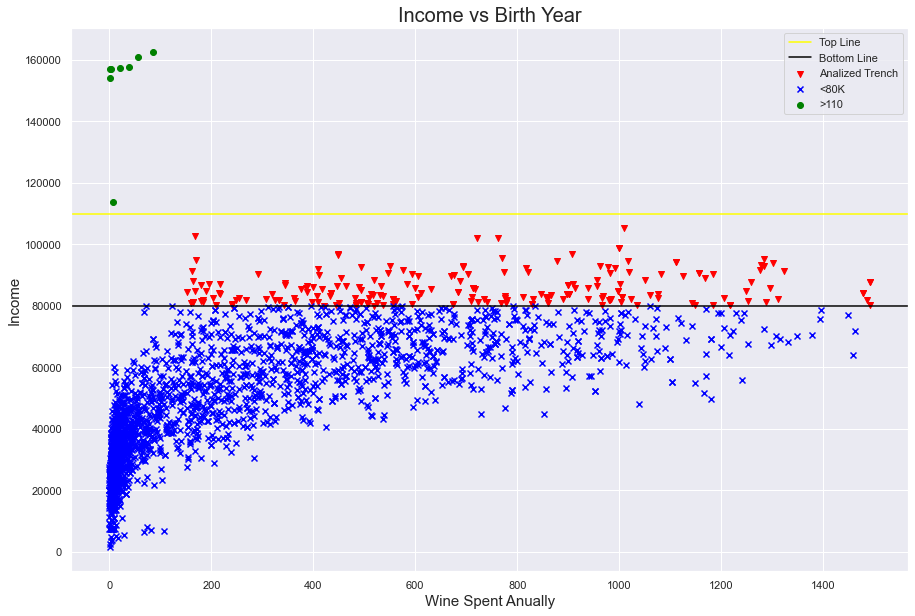

In [132]:
#Ploteamos el mismo scatter, pero con las diferencias de rangos nuevas
plt.figure(figsize=(15,10))
plt.xlabel("Wine Spent Anually", size= 15)
plt.ylabel("Income", size=15)
plt.title("Income vs Birth Year", size = 20)
plt.scatter(df_income_range["MntWines"], df_income_range["Income"], color="red",marker = 'v')
plt.scatter(df_income_not_range["MntWines"], df_income_not_range["Income"], color="blue",marker = 'x')
plt.scatter(df_income_over_range["MntWines"], df_income_over_range["Income"], color="green",marker = 'o')
plt.axhline(y=110000, xmin=0, xmax=2, color="yellow")
plt.axhline(y=80000, xmin=0, xmax=2, color="black")
plt.legend(['Top Line', 'Bottom Line', 'Analized Trench', '<80K', '>110'], loc=1)

En un primer vistazo, no podemos visualmente diferir si existe algún patrón de comportamiento en cuanto a estas dos variavles. Se puede apreciar que los gastos anuales en vino son muy similares para los ingresos que van desde los 40K hasta los 110K.  
 Lo que si se puede ver, es como a más ingreso, se consume más vino, lo cual lo hace una relación proporcional. Es interesante ver que, los salarios más altos, también son los que menos consumen vino, lo cual no podemos identificar cuál podría ser la causa.

[Text(0.5, 1.0, 'Target Salarios 90K o más')]

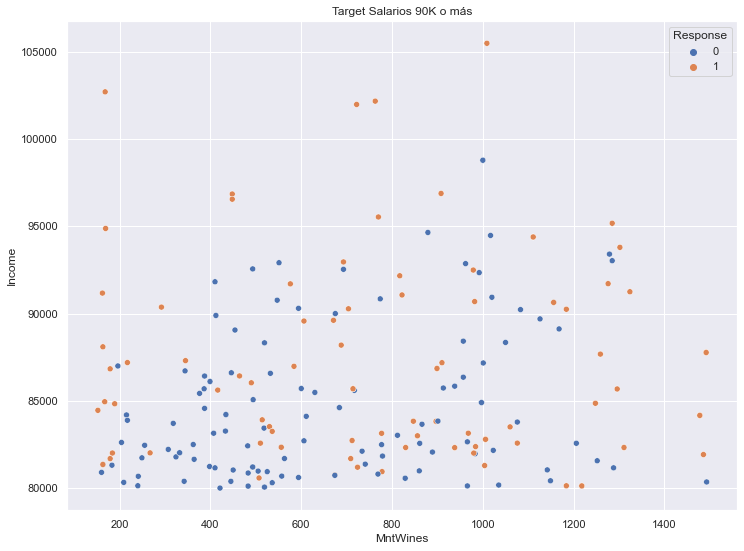

In [133]:
#Nos fijamos de las personas con salario entre 80K y 110K como es su response
sns.scatterplot(x='MntWines', y='Income', data=df_income_range, hue='Response',
                ec=None).set(title='Target Salarios 90K o más')

Lo que hacemos finalmente, es tomar el rango que vas desde 80K hasta los 110K para ver como es el comportamiento que tiene nuestra muestra. Para esto, cruzamos el gráfico con nuestra variable target (Response), para ver la distribución de afirmativos y negativos. Lo que se puede observar es que no hay ningún tipo de relación aparente, casi como si la data fuese aleatoria.

### Wine Vs Cantidad de Hijos por Casa

[Text(0.5, 1.0, 'Cantidad de Vino Comprado por Hijos en Casa')]

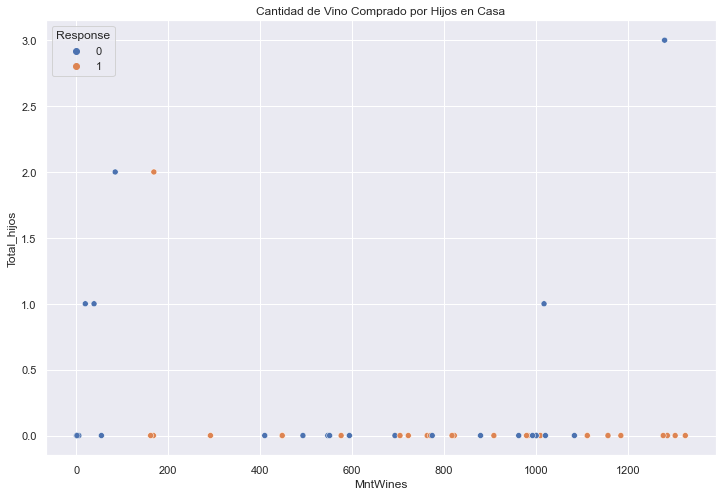

In [134]:
#Me fijo de las personas con salario mayor a 90K como es su response
plt.figure(figsize=(12,8))
sns.scatterplot(x='MntWines', y='Total_hijos', data=df_income_90k_plus, hue='Response',
                ec=None).set(title='Cantidad de Vino Comprado por Hijos en Casa')

### NumWebVisitsMonth Vs NumWebPurchases

<AxesSubplot:xlabel='Education', ylabel='MntWines'>

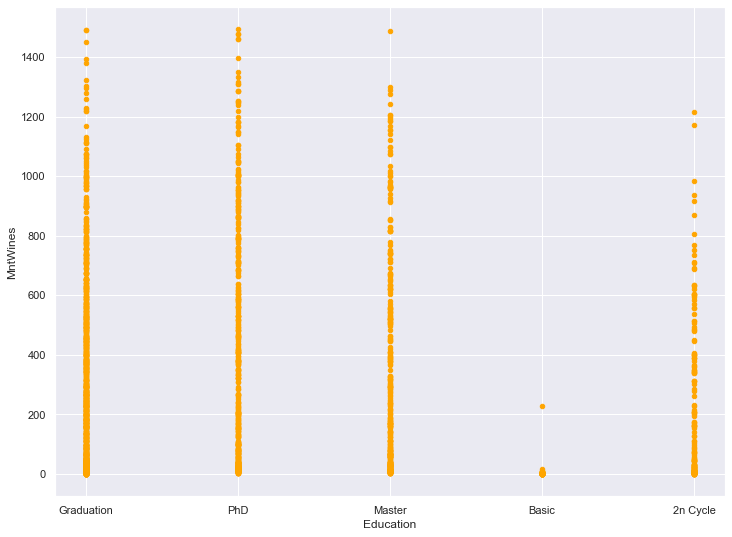

In [135]:
df_f.plot.scatter("Education", "MntWines", color = "orange")

In [136]:
df_f["NumWebVisitsMonth"].corr(df_f["NumWebPurchases"])

-0.05620430428836317

## 3) Comparación de compras de productos (variables)

### Educación: en que momento el customer aceptó la campaña

<AxesSubplot:xlabel='Tipo_Salario'>

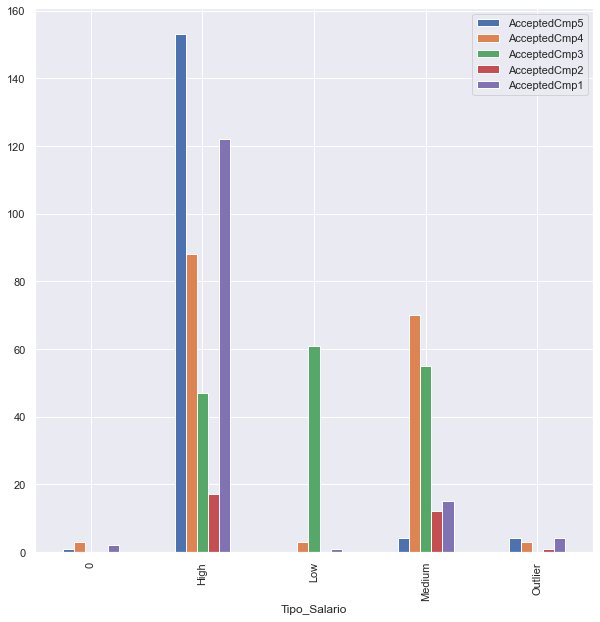

In [137]:
customer_acp = df_f.groupby('Tipo_Salario')[[ 'AcceptedCmp5', 'AcceptedCmp4', 'AcceptedCmp3', 'AcceptedCmp2', 'AcceptedCmp1']].agg('sum')

customer_acp.plot(kind = 'bar', figsize = (10,10))

El resultado de esta query y el gráfico es cuando cada tipo de cliente, con su respectiva educación, aceptó la campaña de marketing. Por ejemplo toda la educación basic aceptó la campaña en la tercer ronda.

## 5) Heatmap

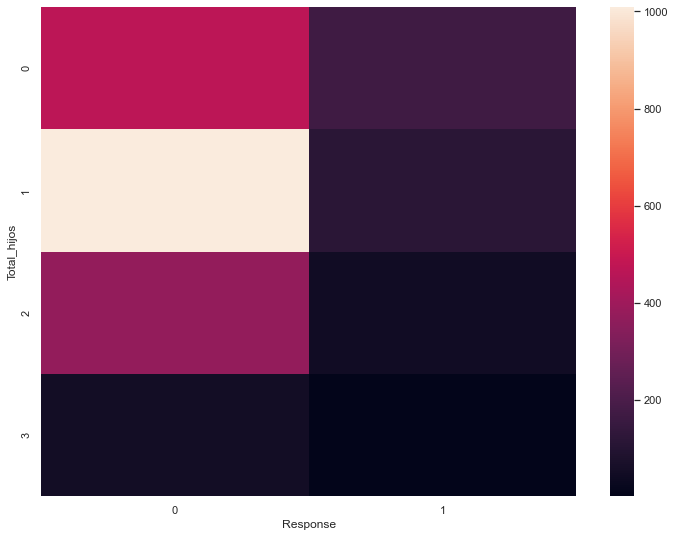

In [138]:
#df_income = df.groupby('ID')['Income']

#df_income.mean()

pd.crosstab(df_f['Total_hijos'], df_f['Response'])

sns.heatmap(pd.crosstab(df_f['Total_hijos'], df_f['Response']))

sns.set(rc = {'figure.figsize':(5,5)})

## Análisis Multivariado de los datos

## 1) Compra de productos: Fish, Meat, Fruit, Sweet, Wines, Gold

In [139]:
#Correlación entre las distintas variables, elegidas teniendo en cuenta el contenido de las columnas

In [140]:
matrix1 = df_f[['MntFishProducts', 'MntMeatProducts', 'MntFruits', 'MntSweetProducts', 'MntWines', 'MntGoldProds']]
mx_sum = matrix1.sum()
mx_sum

MntFishProducts      83931
MntMeatProducts     373375
MntFruits            58753
MntSweetProducts     60552
MntWines            680029
MntGoldProds         98346
dtype: int64

### Bar Chart

Text(0.5, 1.0, 'Food Purchases')

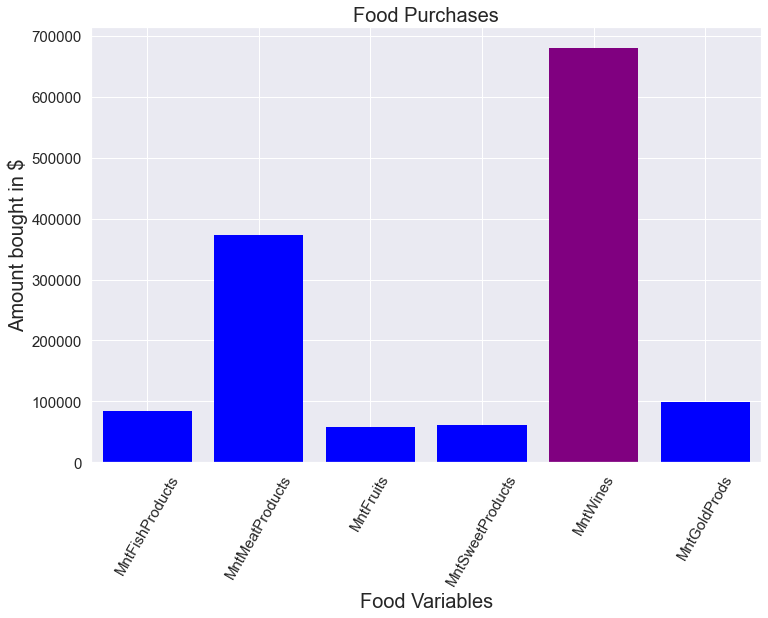

In [141]:
matrix1.sum().plot(kind="bar", figsize=(12, 8), 
                   rot=60, fontsize= 15, cmap="coolwarm")
plt.bar(range(6),mx_sum, align='center', color=['blue','blue','blue','blue','#800080', 'blue'], edgecolor='none')
plt.xlabel("Food Variables", fontsize=20)
plt.ylabel("Amount bought in $", fontsize=20)
plt.title("Food Purchases", fontsize = 20)

### Matriz de correlación de variables

In [142]:
mxcorr = matrix1.corr()
mxcorr.style.background_gradient(axis=0)  
#mxcorr.style.format(na_rep='MISS', precision=3) Éste método fija los decimales que se quieran, pero no lo pude juntar con el color

,MntFishProducts,MntMeatProducts,MntFruits,MntSweetProducts,MntWines,MntGoldProds
MntFishProducts,1.000000,0.567813,0.594415,0.579490,0.398956,0.422018
MntMeatProducts,0.567813,1.000000,0.542030,0.523329,0.561886,0.348727
MntFruits,0.594415,0.542030,1.000000,0.567030,0.388472,0.389999
MntSweetProducts,0.579490,0.523329,0.567030,1.000000,0.385845,0.369084
MntWines,0.398956,0.561886,0.388472,0.385845,1.000000,0.386234
MntGoldProds,0.422018,0.348727,0.389999,0.369084,0.386234,1.000000


### Pairplot

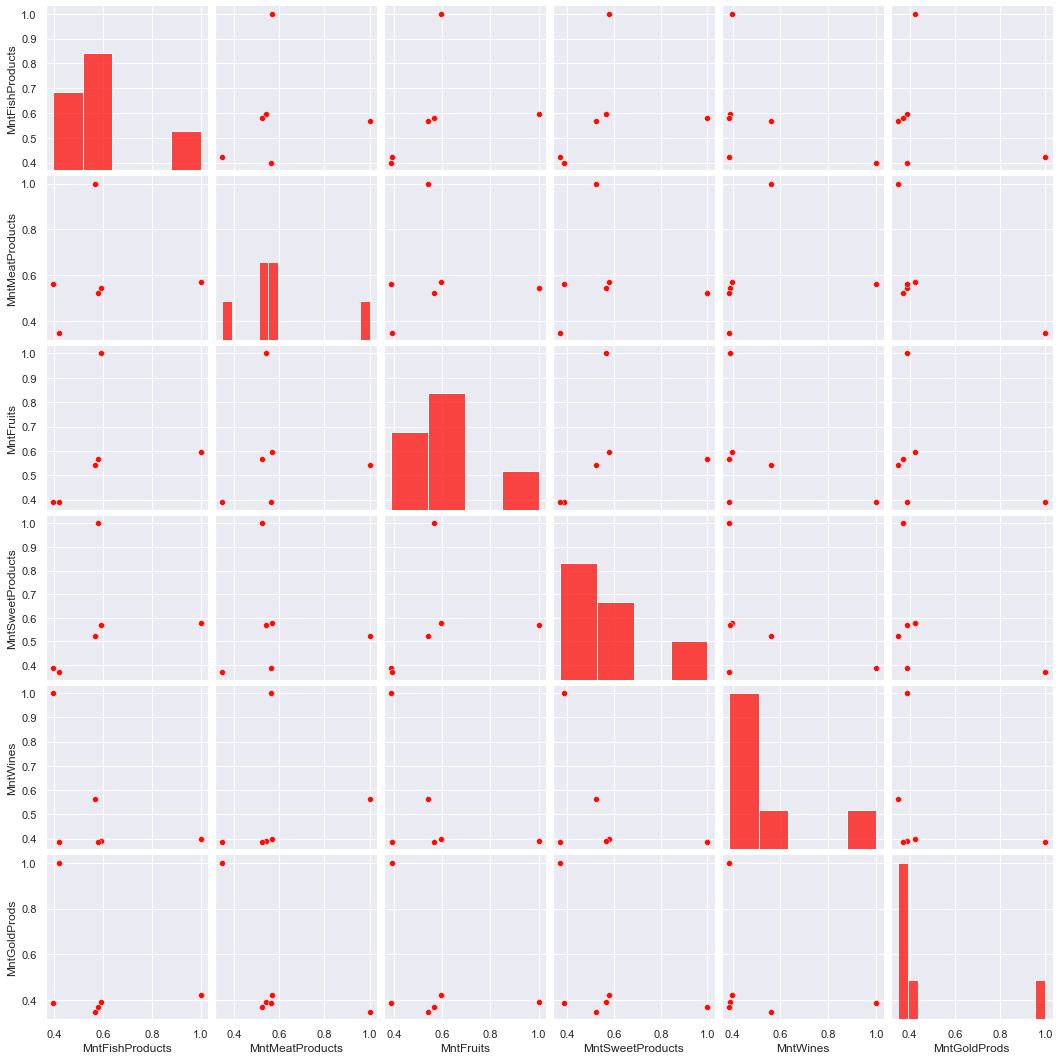

In [143]:
colors = ["#FF0B04"]
sns.set_palette(sns.color_palette(colors))
sns.pairplot(mxcorr)
plt.show()

### Pie Chart

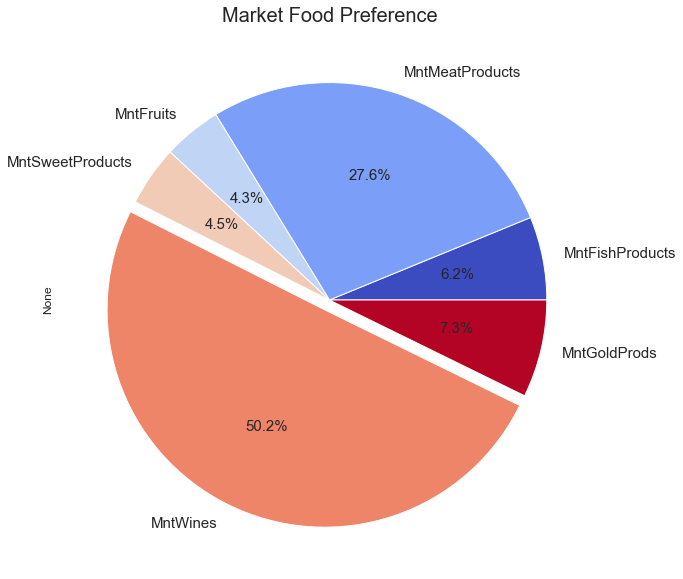

In [144]:
mx_avg = matrix1.mean()
plt.title("Market Food Preference", fontsize = 20)
mx_avg.plot.pie(y='Avg', figsize = (10,10), fontsize= 15, cmap = 'coolwarm', 
                explode = (0, 0, 0, 0 ,0.05, 0), autopct = '%1.1f%%');
#el semicolon elimina el msj predeterminado

Dato Importante: la variable mx_avg reúne el promedio de cada una de las columnas, no el promedio total. El Pie Chart junto con el método autopct me dan los porcentajes luego.

### Income Vs Market Food Preference: Bar Chart

In [145]:
#Busco cual es el salario promedio (sin tener en cuenta outliers, por lo que podría usar otra métrica también)
income_avg = df_f["Income"].mean()
print("El salario promedio es: $", round(income_avg))

El salario promedio es: $ 51959


In [146]:
#Busco por separado el promedio de cada una de las columnas. A esto lo tengo que cambiar por una función.
income_fish = df_f["MntFishProducts"].mean()
income_meat = df_f["MntMeatProducts"].mean()
income_fruits = df_f["MntFruits"].mean()
income_sweet = df_f["MntSweetProducts"].mean()
income_wine= df_f["MntWines"].mean()
income_gold = df_f["MntGoldProds"].mean()

In [147]:
#Acá tengo el avg total de todas las columnas
total_avg_sum = mx_avg.sum()
total_avg_sum

605.9865831842576

In [148]:
#Función para calcular cada uno de los porcentajes, para saber cuanto del sueldo en pesos se gasta en cada producto
def perc(x):
    
    return x * 100 / total_avg_sum
    
fish = perc(income_fish)
meat = perc(income_meat)
fruits = perc(income_fruits)
sweet = perc(income_sweet) 
wine = perc(income_wine) 
gold = perc(income_gold)

In [149]:
#Utilizo una list comprehension para ver cuanto es en pesos lo que se gasta anualmente (teniendo en cuenta que solo se gaste en los productos y mercados analizados)

lista_super_anual = [fish, meat, fruits, sweet, wine, gold]

gasto_total = [income_avg * x / 100 for x in lista_super_anual]

In [150]:
lista_mercado = ['pescado', 'carne', 'fruta', 'dulces', 'vino', 'oro']

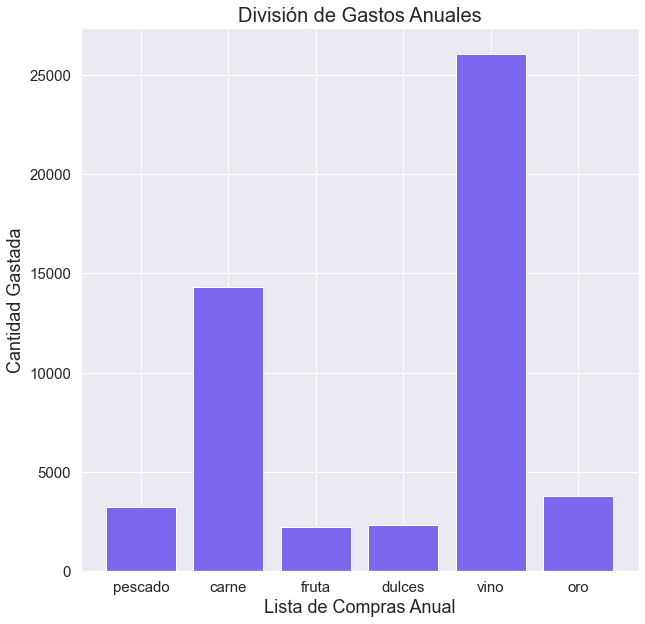

In [151]:
#Finalmente acá hago un gráfico donde se puede ver cuanto se gasta en dinero anualmente por cada producto que se compra
fig = plt.figure(figsize = (10, 10))
plt.bar(lista_mercado, gasto_total, color = 'mediumslateblue')
plt.xlabel("Lista de Compras Anual", fontsize=18)
plt.ylabel("Cantidad Gastada", fontsize=18)
plt.title("División de Gastos Anuales", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### Income vs Total Amount Spent

#### Acá lo que vamos a hacer es la sumatoria de lo que se gasta por año para cada uno de los clientes.
#### En este punto es que nos damos cuenta, que nos está faltando una variable sumamente importante, la cual es, los gastos totales por cada uno de los clientes.

In [152]:
#Armamos una nueva columna al dataframe donde se sumen los gastos anuales de todos los clientes.
df_f['Anual_Spents'] = df_f.loc[df['MntWines'] >= 0,['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                        'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

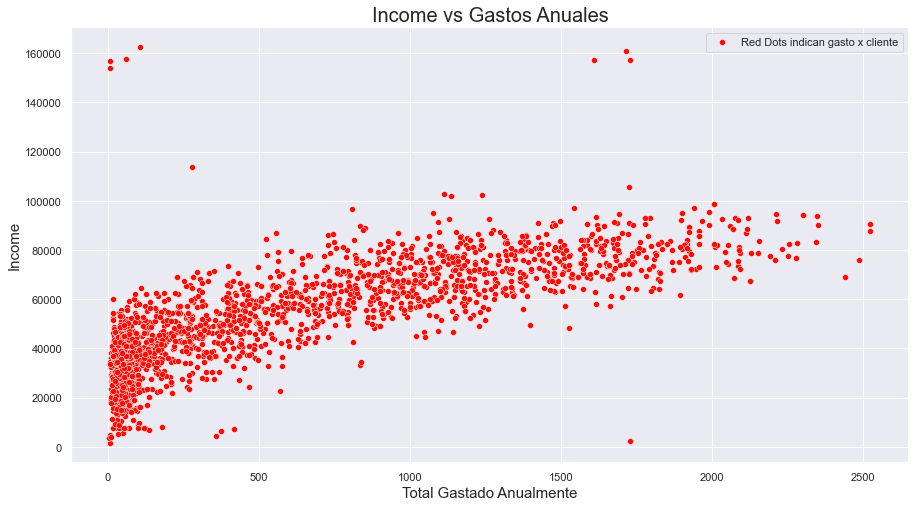

In [153]:
#Armo un dataset para ver cuanto se gastó en total por todos los clientes.
anual_spent = df_f[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                        'MntSweetProducts', 'MntGoldProds']].sum().sum()


plt.figure(figsize=(15,8))
plt.xlabel("Total Gastado Anualmente", size= 15)
plt.ylabel("Income", size=15)
plt.title("Income vs Gastos Anuales", size = 20)
sns.scatterplot(x=df_f.Anual_Spents, y=df_f.Income) 
plt.legend(['Red Dots indican gasto x cliente'], loc=1)

## 2) Income: Kids Home, Teens Home, Salary Types

### Bar Chart: Ingresos Vs Status Marital Vs Niños

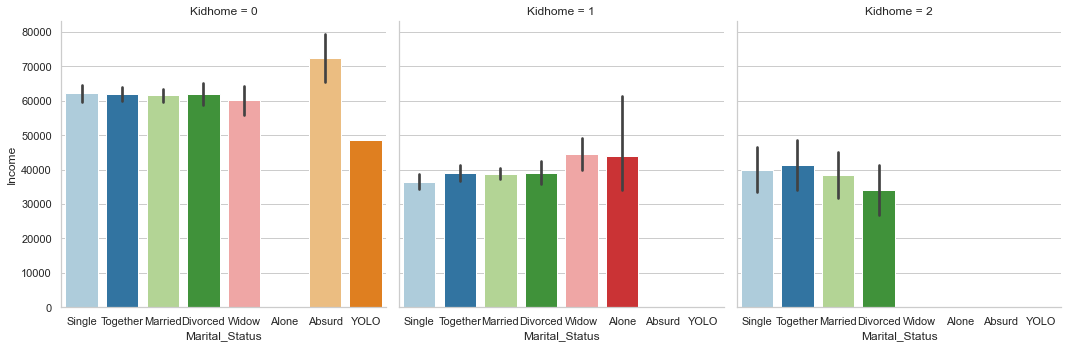

In [154]:
#En este gráfico comparo tres variables, y hay bastante para analizar.
sns.set_style('whitegrid')
sns.catplot(x="Marital_Status", y="Income", data=df_f, kind="bar", col="Kidhome", palette = 'Paired')

Text(0.5, 1.0, 'Salario en base a cantidad de hijos')

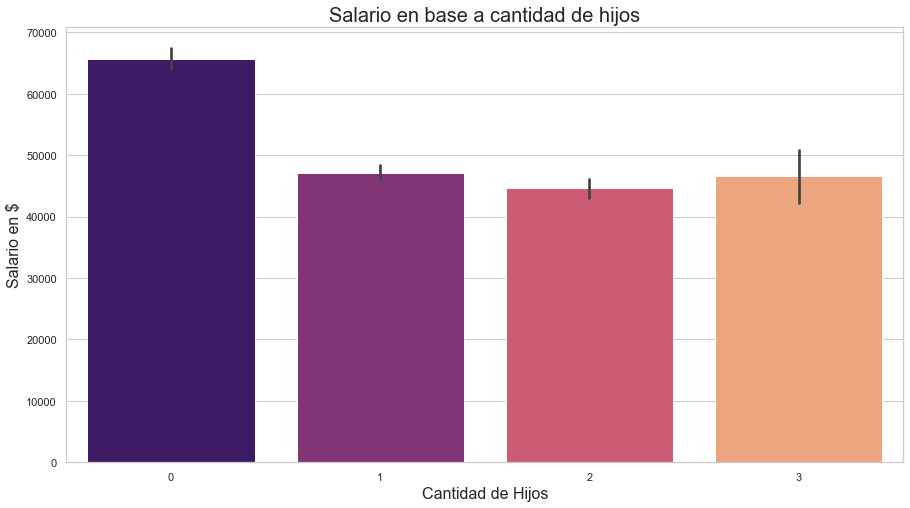

In [155]:
#En este gráfico comparo tres variables, y hay bastante para analizar.
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.barplot(x="Total_hijos", y="Income", data=df_f, palette = 'magma')
plt.xlabel("Cantidad de Hijos", size= 16)
plt.ylabel("Salario en $", size=16)
plt.title("Salario en base a cantidad de hijos", size = 20)

En este gráfico, como puse, hay varias cosas para mencionar. Primero, tenemos varios outliers en los sueldos, sobre todo en los que creen que el matrimonio es absurdo y que, además, no tienen hijos.    
Otra cosa, es que cuanto más hijos se tienen, menor parece ser los ingresos. Se podría decir que es una variable directamente proporcional.  
Por último, se puede apreciar como en el primer gráfico, aparecen con salario los Absurd y los YOLO que, justamente no tienen hijos. En los dos restantes, no figuran con ingresos.

### Bar Chart: Ingresos Vs Status Marital Vs Adolescentes

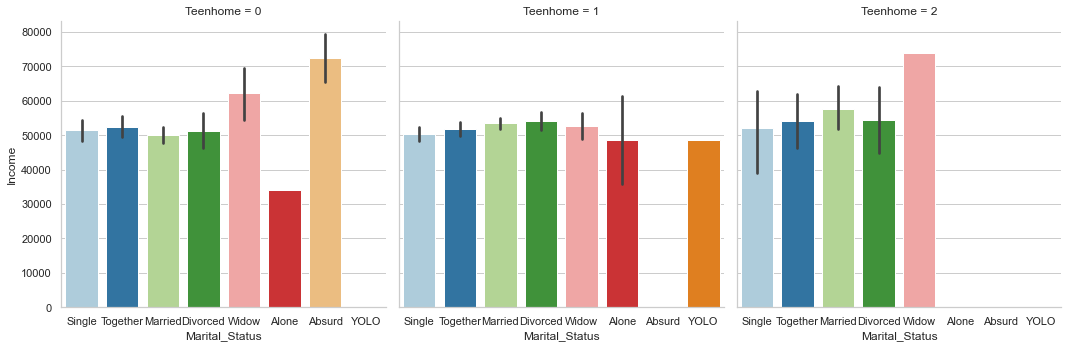

In [156]:
sns.set_style('whitegrid')
sns.catplot(x="Marital_Status", y="Income", data=df_f, kind="bar", col="Teenhome", palette = 'Paired')

Lo que nos queda de este Dataset, es que diferencia la cantidad de hijos que tienen en una casa.

### Salary Types

<AxesSubplot:xlabel='Income', ylabel='Count'>

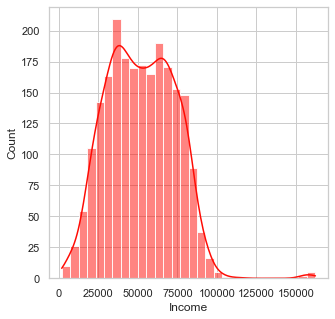

In [157]:
#Vuelvo a utilizar este gráfico del desafío anterior, para ver como se distribuyen los sueldos
sns.histplot(data=df_f, x='Income', bins=30, kde=True)

In [158]:
#Para esta sección, lo que intento es hacer una discriminación de los salarios, para que queden agrupados de otra forma
#Tienen carácter subjetivo, pero basicamente separo en tres dentro de la curva del gráfico, más un tipo de salario más, los que se encuentra por fuera

In [159]:
outlier_income = df_f.loc[df_f["Income"] >= 100000]
high_income = df_f[(df_f.Income >= 65000) & ( df.Income < 100000)]
medium_income = df_f[(df_f.Income >= 40000) & ( df.Income < 65000)]
low_income = df_f[(df_f.Income < 40000)]

C:\Users\usuario\AppData\Local\Temp/ipykernel_11868/1059624541.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_income = df_f[(df_f.Income >= 65000) & ( df.Income < 100000)]
C:\Users\usuario\AppData\Local\Temp/ipykernel_11868/1059624541.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  medium_income = df_f[(df_f.Income >= 40000) & ( df.Income < 65000)]


In [160]:
salary_list = [low_income["Income"].count(), medium_income["Income"].count(), high_income["Income"].count(), outlier_income["Income"].count()] 

salary_type = ["Low", "Medium", "High", "Outlier"]

salary_list

[731, 807, 662, 12]

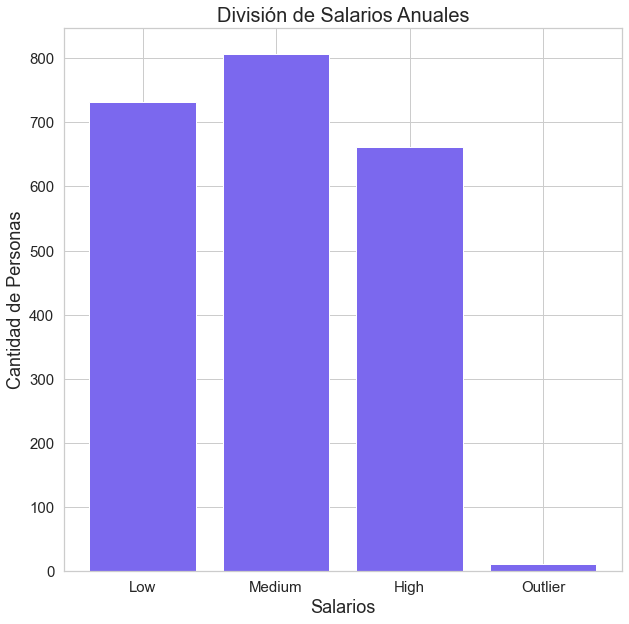

In [161]:
#Gráfico para ver la división de salarios de las personas
fig = plt.figure(figsize = (10, 10))
plt.bar(salary_type, salary_list, color = 'mediumslateblue')
plt.xlabel("Salarios", fontsize=18)
plt.ylabel("Cantidad de Personas", fontsize=18)
plt.title("División de Salarios Anuales", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## 3) Correlaciones entre las variables

<AxesSubplot:>

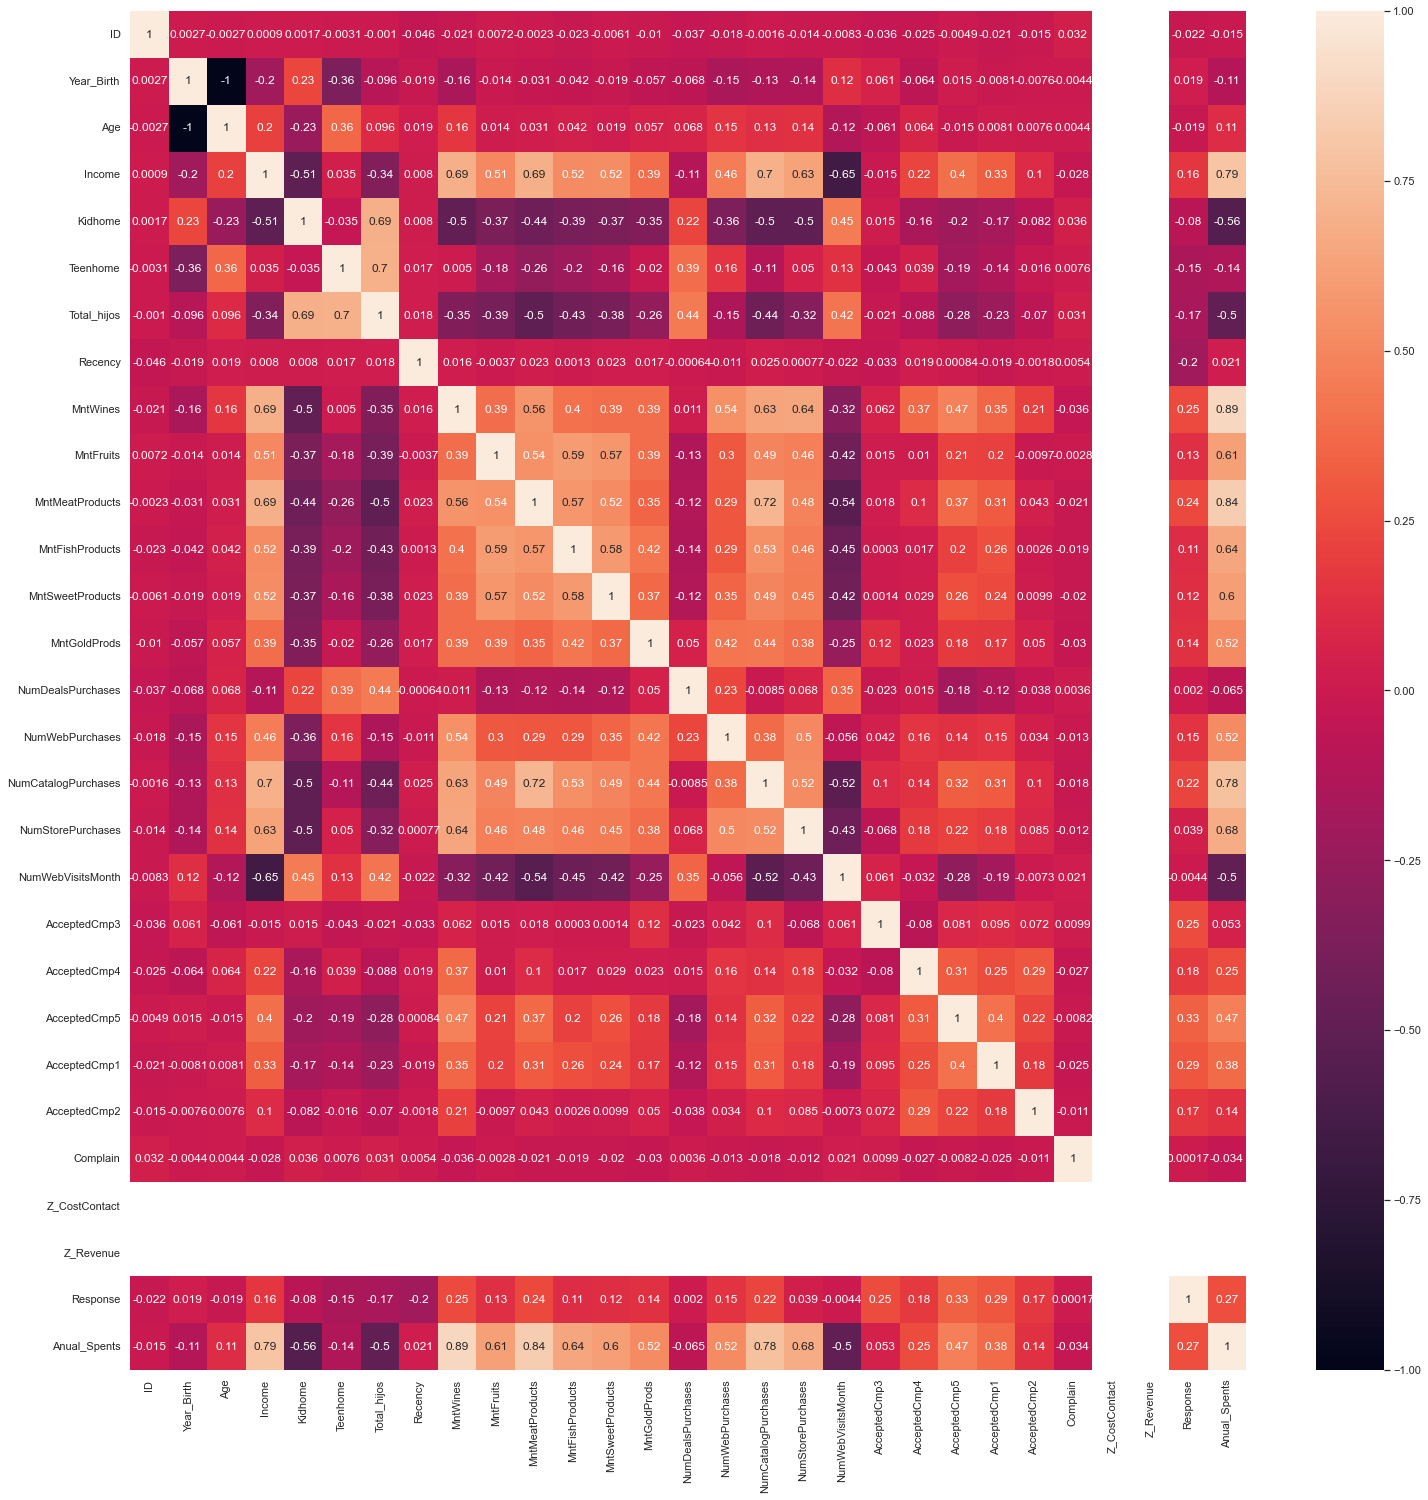

In [162]:
#Hacemos una correlación entre todas las variables, para tener un panorama completo
plt.figure(figsize=(25,25))
vg_corr = df_f.corr()
sns.heatmap(vg_corr, xticklabels = vg_corr.columns.values, yticklabels = vg_corr.columns.values, annot = True)

<AxesSubplot:>

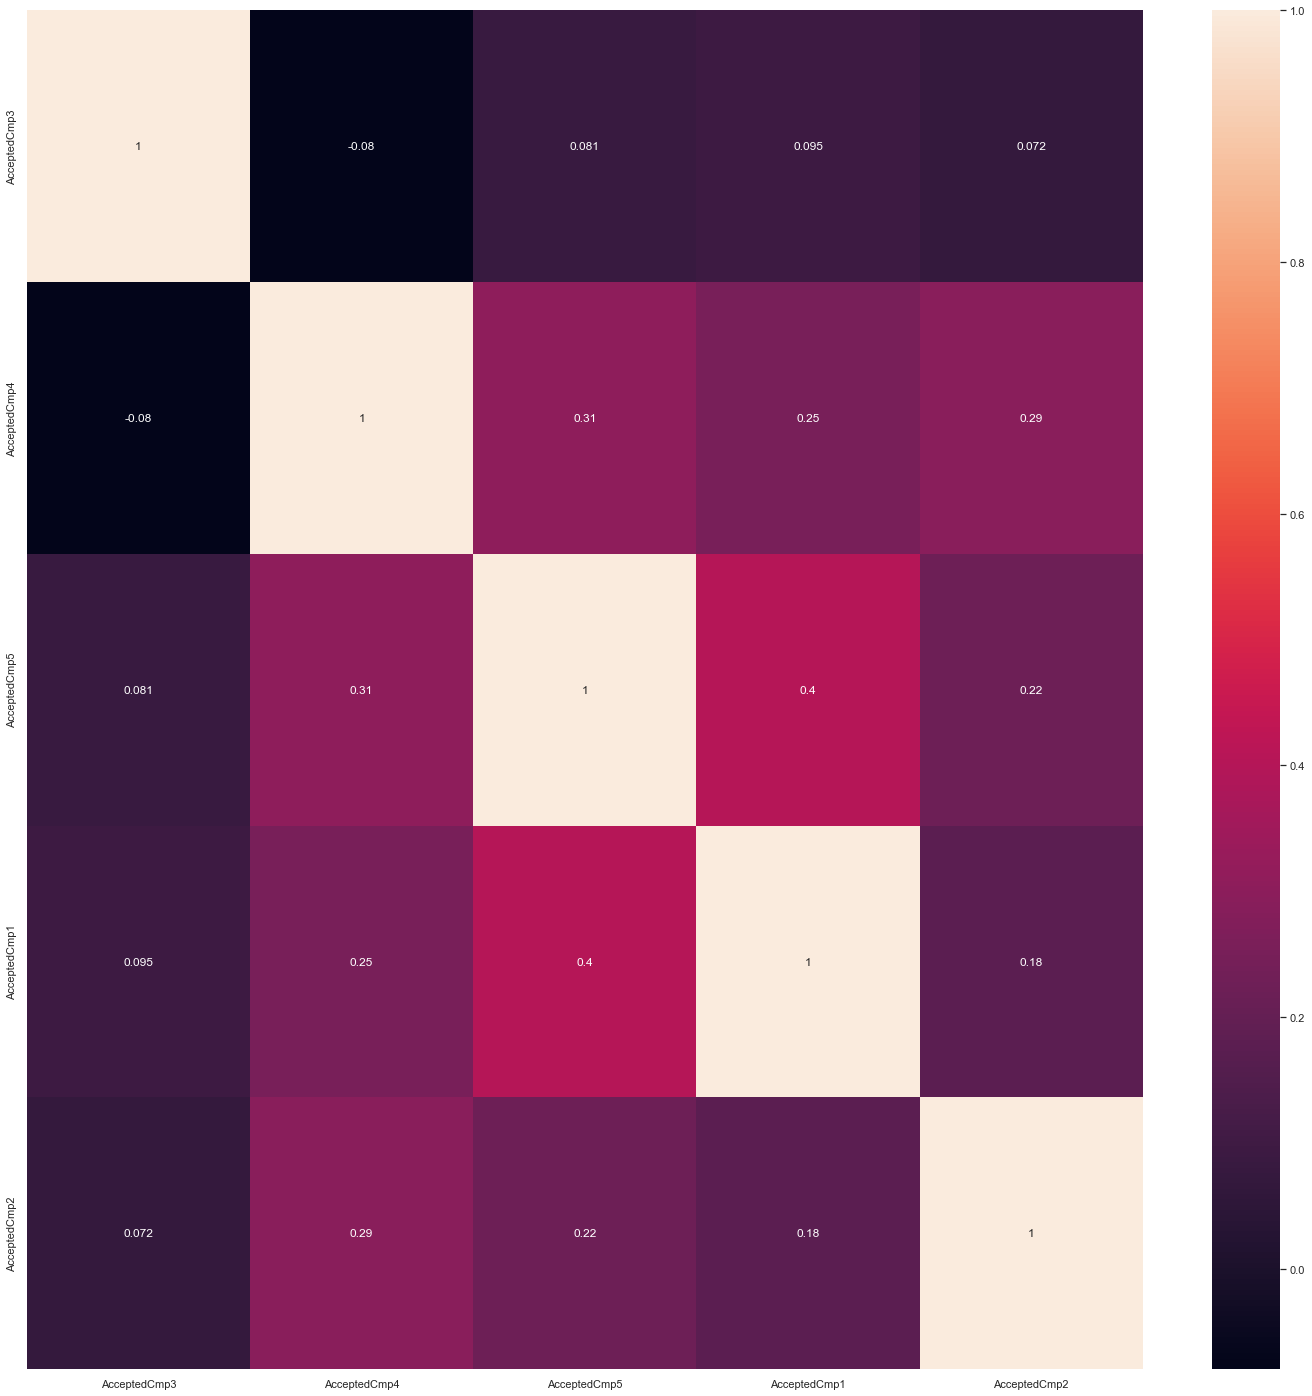

In [163]:
#Hacemos una correlación entre las distintas campañas que se hicieron, para conocer sus correlaciones
plt.figure(figsize=(25,25))
vg_corr = df_f[['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].corr()
sns.heatmap(vg_corr, xticklabels = vg_corr.columns.values, yticklabels = vg_corr.columns.values, annot = True)

<AxesSubplot:>

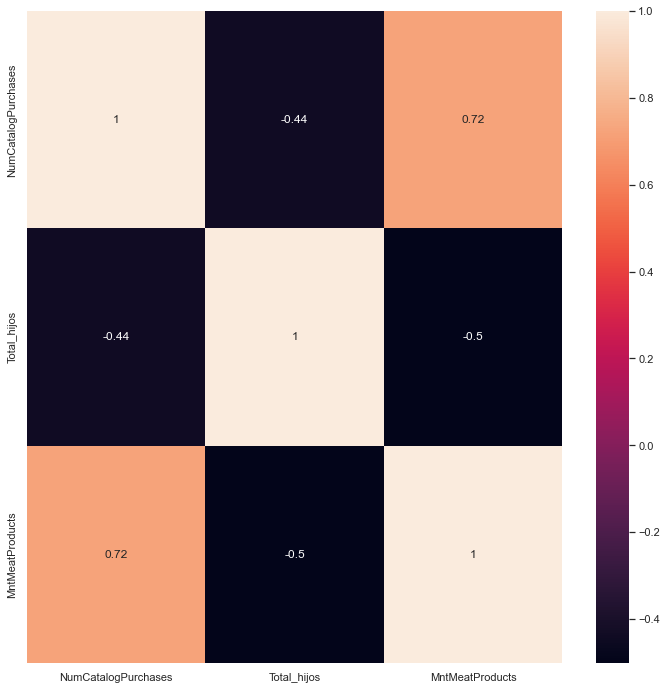

In [164]:
#Otra correlación con cantidad de hijos, compras por catalogo y compra de carne
plt.figure(figsize=(12,12))
vg_corr = df_f[['NumCatalogPurchases', 'Total_hijos', 'MntMeatProducts']].corr()
sns.heatmap(vg_corr, xticklabels = vg_corr.columns.values, yticklabels = vg_corr.columns.values, annot = True)

En este gráfico, podemos observar que la cantidad de compra de carne es directamente proporcional a la cantidad de veces que se realizan compras por catalogo.  
Ahora, en cambio, tiene un carácter indirectamente proporcional el tener hijos y comprar carne. Pareciera indicar que los padres que tienen hijos no realizan sus compras por catalogo. 

# Regresión Lineal 

In [172]:
#Regresion Lineal
from sklearn.model_selection import train_test_split

X = df_f[['Anual_Spents']]
Y = df_f['Income']

#Train y Test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


df_f = df_f.dropna(how='all')
df_f.replace([np.inf, -np.inf], np.nan, inplace=True)
df_f.fillna(999, inplace=True)

#X = X.values.astype(np.float)
#y = y.values.astype(np.float)

In [173]:
#Importamos, creamos y fiteamos el modelo
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)

In [174]:
print('Puntaje Entrenamiento: ', linear_model.score(x_train, y_train))

Puntaje Entrenamiento:  0.6184067664519364


In [175]:
#Realizamos las predicciones
y_pred = linear_model.predict(x_test)

In [176]:
from sklearn.metrics import r2_score

print('Puntaje Testing: ', r2_score(y_test, y_pred))

Puntaje Testing:  0.5081125454671673


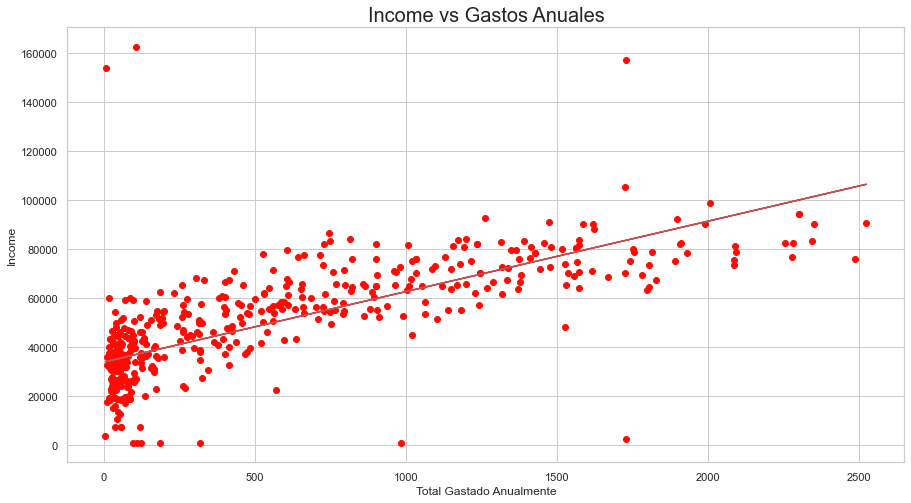

In [177]:
#Ploteamos 
fig, ax = plt.subplots(figsize=(15, 8))

plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, color='r')

plt.title("Income vs Gastos Anuales", size = 20)
plt.xlabel('Total Gastado Anualmente')
plt.ylabel('Income')
plt.show()

In [178]:
#Evaluación de Modelos
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 10664.235917238231
Mean Squared Error: 253563509.27714354
Root Mean Squared Error: 15923.677630407605


# Regresión Logística

<AxesSubplot:xlabel='Anual_Spents', ylabel='Income'>

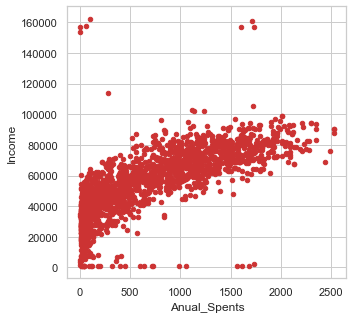

In [179]:
df_f.plot.scatter("Anual_Spents", "Income", color=(0.8,0.2,0.2)) #poner color como parámetro me evita un warning, para ver cual es, ejecutar la misma línea, pero borrar la variable color

In [180]:
X_train, X_test, y_train, y_test = train_test_split(df_f[["Anual_Spents"]], df_f.Income, train_size=0.7)

In [181]:
#Tenemos que escalar los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.fit_transform(X_test)

In [182]:
#Eligo tener un test del muestreo de un 30% del total
print("La cantidad de muestras de testeo es:", len(X_test),"\nLa cantidad de muestras de entrenamiento es:",  len(X_train))

La cantidad de muestras de testeo es: 671 
La cantidad de muestras de entrenamiento es: 1565


In [183]:
model_lr = LogisticRegression()

In [184]:
#Entrenamiento del modelo
model_lr.fit(X_train, y_train)

LogisticRegression()

In [185]:
#La predicción del algoritmo
model_lr.predict(X_test)

array([  999.,  7500.,   999.,   999.,   999.,   999.,  7500.,   999.,
        7500.,  7500.,   999.,   999.,  7500., 67546.,   999.,   999.,
         999.,  7500.,   999.,   999.,  7500.,   999.,   999.,   999.,
         999.,  7500.,   999.,   999.,   999.,   999.,   999., 83844.,
         999.,   999.,   999.,  7500.,   999.,  7500.,  7500.,  7500.,
         999.,   999.,   999.,  7500.,  7500.,   999.,   999.,  7500.,
         999.,   999.,  7500.,   999.,   999.,  7500.,  7500.,   999.,
         999.,  7500.,   999.,  7500.,   999.,   999.,  7500.,   999.,
         999.,  7500., 83844.,   999.,   999.,   999.,   999.,   999.,
         999.,   999.,  7500.,   999.,   999.,   999.,   999.,   999.,
         999.,   999.,   999.,  7500.,  7500.,  7500.,  7500.,  7500.,
       67546.,   999.,  7500., 83844.,  7500.,  7500.,   999.,  7500.,
         999.,  7500., 83844.,  7500.,   999.,   999.,   999.,   999.,
        7500.,   999.,  7500.,  7500.,   999.,   999.,   999.,  7500.,
      

In [186]:
#Veo la accuracy del model utilizando el método score
model_lr.score(X_test, y_test)

0.014903129657228018

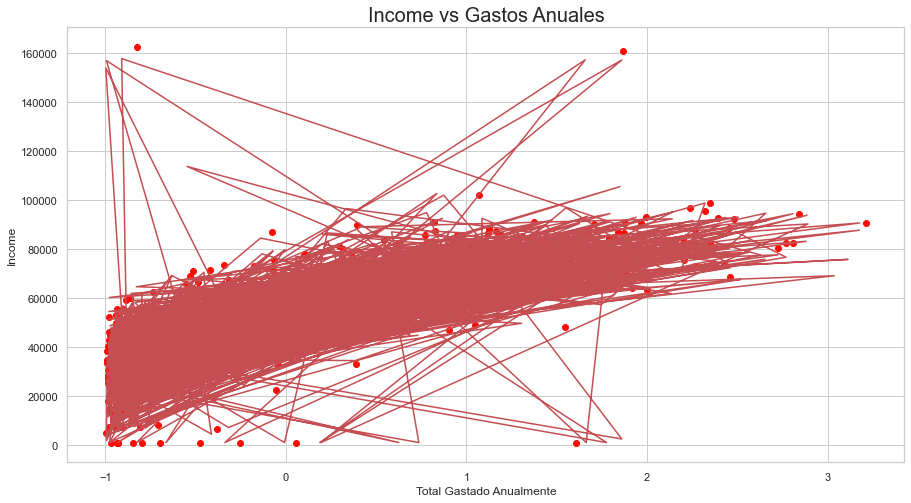

In [187]:
#Ploteamos 
fig, ax = plt.subplots(figsize=(15, 8))

plt.scatter(X_test, y_test)
plt.plot(X_train, y_train, color='r')

plt.title("Income vs Gastos Anuales", size = 20)
plt.xlabel('Total Gastado Anualmente')
plt.ylabel('Income')
plt.show()

#### Podemos ver que como no hay diferencia entre los responses afirmativos y los negativos, no tiene sentido el graficar la regresión logística

# Random Forest

In [199]:
#Armamos las variables para analizar, en un nuevo dataset
inputs = df_f.drop("Response", axis = 'columns')

target = df_f['Response']

df_forest = df_f[["Education", "Marital_Status", "Income", "Anual_Spents"]]

In [200]:
#Uso el método LabelEncoder para asignar un valor número a las variables categóricas (las numéricas quedan como están)
lb_education = LabelEncoder()
lb_marital = LabelEncoder()

In [201]:
#Agregamos las nuevas variables al dataset de prueba
df_forest["education_n"] = lb_education.fit_transform(inputs["Education"])
df_forest["marital_m"] = lb_education.fit_transform(inputs["Marital_Status"])

C:\Users\usuario\AppData\Local\Temp/ipykernel_11868/1632103294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forest["education_n"] = lb_education.fit_transform(inputs["Education"])
C:\Users\usuario\AppData\Local\Temp/ipykernel_11868/1632103294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forest["marital_m"] = lb_education.fit_transform(inputs["Marital_Status"])


In [202]:
#Elimino las columnas con valores categóricos, solo quedan ahora números que representan lo mismo
df_forest_2 = df_forest.drop(["Education", "Marital_Status"], axis="columns")
df_forest_2

,Income,Anual_Spents,education_n,marital_m
0,58138.0,1617,2,4
1,46344.0,27,2,4
2,71613.0,776,2,5
3,26646.0,53,2,5
4,58293.0,422,4,3
...,...,...,...,...
2235,61223.0,1341,2,3
2236,64014.0,444,4,5
2237,56981.0,1241,2,2
2238,69245.0,843,3,5


In [203]:
#Separamos en X e y
X = df_forest_2
y = df_f["Response"]

In [204]:
#Separamos en train y test!
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

In [205]:
#Creamos un arbol de decisión sencillo y lo fiteamos
tree = DecisionTreeClassifier(random_state=11)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [206]:
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [207]:
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7943368107302533


In [208]:
#Creamos un random forest!
model = RandomForestClassifier(random_state=11, n_estimators=200,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=11)

In [209]:
y_test_pred = model.predict(X_test) #Prediccion en Test

In [210]:
#Calculo el accuracy en Test
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.8464977645305514


# Resumen de los Algoritmos

El algoritmo de regresión lineal en un principio parece que nos puede ser de gran utilidad. Para esto se tiene que seguir trabajando para buscar su optimización, y ver si podemos llegar a mejores resultados. Para esta entrega no lo vamos a usar para hacer análisis, porque consideramos que no aporta información suficiente.  

El algoritmo de regresión lineal, fue más útil de lo que pudimos anticipar. Desde un comienzo, no habíamos tenido en cuenta que podíamos hacer una sumatoria de todos los gastos anuales, es por esto que el propio data wrangling lo hacemos en el desarrollo de las variables. Al realizar esta sumatoria y contrastarla con los ingresos, terminamos teniendo un gráfico con una distribución claramente lineal. En esta distribución, podemos identificar que hay una clara tendencia a consumir mayor cantidad de productos, dado un nivel más alto de salario.  

El último algoritmo, el random forest, fue el que más nos sorprendió, porque tuvo un rendimiento mayor que los otros dos. Lo vamos a tener en cuenta para poder seguir sacando información de sus resultados.

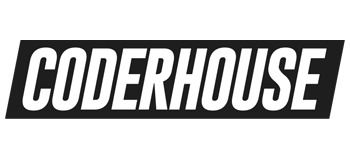